In [1]:
import numpy as np
import matplotlib.pyplot as plt
from spine_detector.masking.gradient import box_filtering_via_gauss

def inflate(mask, radius, threshold=1):
    mask = mask.astype(np.float)
    mask = box_filtering_via_gauss(mask, degree=1, size=radius) + 1e-100
    radius = np.array(radius)
    mask = mask * np.power(np.prod(radius), 1 / 3) * np.power(2 * np.pi, 1 / 2) * 4
    print(mask.max())
    print(mask.min())
    mask = np.log(mask)
    print(mask.max(), mask.min())
    mask[mask > 0] = 0
    mask = np.sqrt(-mask * 2)
    print(mask.max(), mask.min())
    return mask <= threshold

0.07738376406222244
3.0079539295572005e-99
-2.558978287028507 -226.8546641164119
21.30045370955332 2.262290117128441


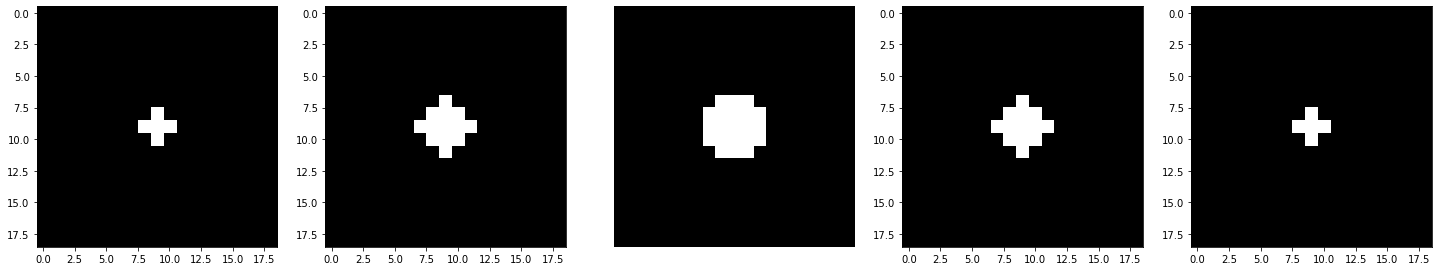

In [2]:
a = np.zeros((5, 19, 19), dtype=np.float)
a[2][9][9] = 1.

inflated_data = inflate(a, (3,3,3), threshold=2.4)

fig, ax = plt.subplots(ncols=5, figsize=(25, 5))
ax[0].imshow(inflated_data[0], cmap='gray')
ax[1].imshow(inflated_data[1], cmap='gray')
ax[2].imshow(inflated_data[2], cmap='gray')
ax[2].axis('off')
ax[3].imshow(inflated_data[3], cmap='gray')
ax[4].imshow(inflated_data[4], cmap='gray')

# Save just the portion _inside_ the second axis's boundaries
extent = ax[2].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('inflated_image.png', bbox_inches=extent)

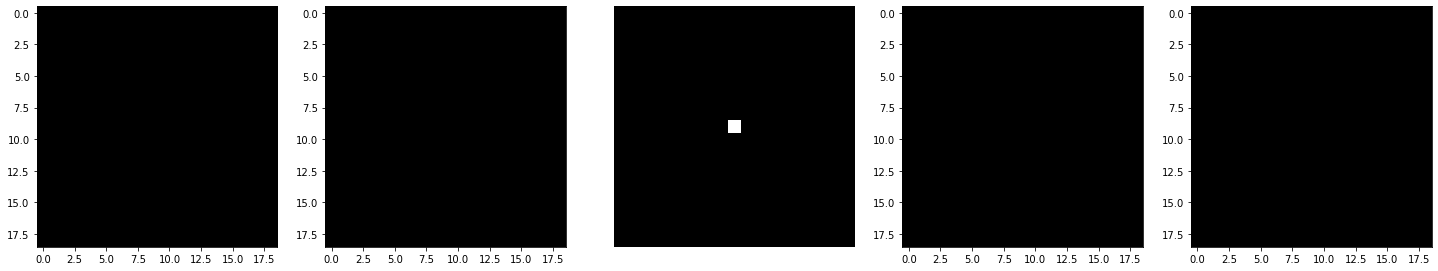

In [3]:
fig, ax = plt.subplots(ncols=5, figsize=(25, 5))
ax[0].imshow(a[0], cmap='gray')
ax[1].imshow(a[1], cmap='gray')
ax[2].imshow(a[2], cmap='gray')
ax[2].axis('off')
ax[3].imshow(a[3], cmap='gray')
ax[4].imshow(a[4], cmap='gray')

# Save just the portion _inside_ the second axis's boundaries
extent = ax[2].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('before_inflate.png', bbox_inches=extent)

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(a[2], cmap='gray')
ax.axis('off')


(-0.5, 18.5, 18.5, -0.5)

In [5]:

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(inflated_data[2], cmap='gray')
ax.axis('off')

(-0.5, 18.5, 18.5, -0.5)

In [2]:
from PIL import Image
import numpy as np

im = np.array(Image.open('../tst_image.png'))


In [11]:
from skimage import color
only_gray = im[:,:, 0].copy()
only_gray[only_gray != 255] = 0

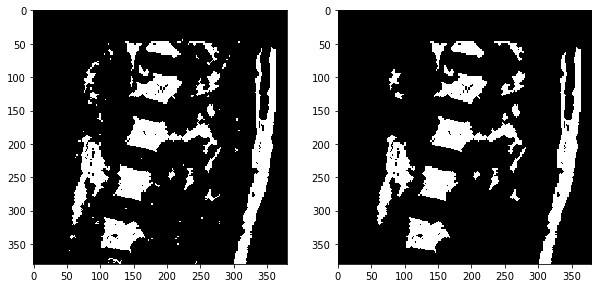

In [18]:
from skimage.morphology import remove_small_objects

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(only_gray, cmap='gray')
ax[1].imshow(remove_small_objects(only_gray.astype(bool)), cmap='gray')
